## Lab 2

Importowanie bibliotek:

In [179]:
import timeit
import numpy as np
import pandas as pd
import scipy as scp
import os
import random as rd
import networkx as nx
import matplotlib.pyplot as plt

In [109]:
# Gauss
def Gaus(new_A,B,m,n):
    A = [[new_A[i][j] for j in range(m)] for i in range(m)]
    #extending matrix
    for i in range(m):
        A[i].append(B[i][0])

    h = 0 #/* Initialization of the pivot row */
    k = 0 #/* Initialization of the pivot column */

    while h < m and k < n:
        #/* Find the k-th pivot: */
        i_max = np.argmax([abs(A[i][k]) for i in range(h,m)]) + h
        # print("1: ",i_max, A[i_max][k])
        # i_max = 0
        # s_max = 0
        # for i in range(h,m):
        #     if abs(A[i][k]) > s_max:
        #         s_max = abs(A[i][k])
        #         i_max = i
        # print("2: ",i_max,A[i_max][k])

        if A[i_max][k] == 0:
            #/* No pivot in this column, pass to next column */
            k = k + 1
        else:
             # swap rows(h, i_max)
            A[h],A[i_max] = A[i_max],A[h]
             # Do for all rows below pivot:
            for i in range(h+1,m):
             # for i = h + 1 ... m:
                f = A[i][k] / A[h][k]
                 # /* Fill with zeros the lower part of pivot column: */
                A[i][k] = 0
                 # /* Do for all remaining elements in current row: */
                for j in range(k+1,n):
                 # for j = k + 1 ... n:
                     A[i][j] = A[i][j] - A[h][j] * f
             # /* Increase pivot row and column */
            h = h + 1
            k = k + 1

    #making solution
    C = [0 for _ in range(len(A[0])-1)]
    for y in range(m-1,-1,-1):
        # print(f"Y: { y }")
        for x in range(n-2,y,-1):
            A[y][n-1] = A[y][n-1]-(A[y][x]*C[x])
        C[y] = A[y][n-1]/A[y][y]
    return C

Przykładowe równania i wywołanie:

In [112]:
A = np.array([[1,2,5],[7,2,3],[1,7,9]])
B = np.array([[5],[7],[3]])
pd.DataFrame(Gaus(A,B,3,4),columns=["X"])

,X
0,0.821429
1,-1.571429
2,1.464286


In [226]:
pd.DataFrame(np.linalg.solve(A,B),columns=["X"])

,X
0,0.821429
1,-1.571429
2,1.464286


Przykładowy matrix n = 10:

In [234]:
n = 10
A = np.random.randint(low = 1,high = n,size = [n,n])
B = np.random.randint(low = 1,high = 2*n,size = [n,1])

In [235]:
pd.DataFrame(np.linalg.solve(A,B),columns=["X"])

,X
0,-0.442668
1,-1.517008
2,0.248117
3,0.218685
4,0.658396
5,1.077699
6,-1.002605
7,-0.556397
8,2.185579
9,0.208247


In [236]:
pd.DataFrame(Gaus(A,B,n,n+1),columns=["X"])

,X
0,-0.442668
1,-1.517008
2,0.248117
3,0.218685
4,0.658396
5,1.077699
6,-1.002605
7,-0.556397
8,2.185579
9,0.208247


Porównanie czasów dla różnych matrixów n > 500

In [279]:
def time_comparison():
    n = 500
    n_tab = [n + i*10 for i in range(10)]
    answer_time_tab = []
    for n in n_tab:
        temp_tab = []
        A = np.random.randint(low = 1,high = 2*n,size = [n,n])
        B = np.random.randint(low = 1,high = 2*n,size = [n,1])
        temp_tab.append(n)
        temp_tab.append(timeit.timeit(lambda: np.linalg.solve(A,B),number = 1))
        temp_tab.append(timeit.timeit(lambda: np.linalg.lstsq(A,B,rcond=None),number = 1))
        temp_tab.append(timeit.timeit(lambda: Gaus(A,B,n,n+1),number = 1))
        answer_time_tab.append(temp_tab)
    return answer_time_tab

In [281]:
df = time_comparison()

In [282]:
pd.DataFrame(df,columns = ['N','Linalg.solve [s]','Linalg.lstsq [s]','Gauss [s]'])

,N,Linalg.solve [s],Linalg.lstsq [s],Gauss [s]
0,500,0.037076,0.184672,7.158597
1,510,0.046112,0.187632,7.132634
2,520,0.255390,0.239311,7.279175
3,530,0.008128,0.183020,7.495507
4,540,0.008480,0.187529,7.919631
5,550,0.005536,0.208459,8.373148
6,560,0.005829,0.211262,8.841209
7,570,0.005107,0.210998,9.313508
8,580,0.004754,0.219002,9.803207
9,590,0.006983,0.221461,10.346034


Możemy zauważyć, że czasowo znacznie się róznią te metody zwłaszcza Gauss, jest
to spowodowane prawdopodobnie implementacją, a dodatkowo te biblioteki bazują na języku C

Faktoryzacja LU

In [324]:
def LU(A,n):
    M = [[0 for _ in range(n)] for _ in range(n)]
    # U = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(0,n):
        for j in range(0,i+1):
            M[j][i] = A[j][i]
        for j in range(i+1,n):
            #There is possibility of dividing by 0
            w = A[j][i]/A[i][i]
            M[j][i] = w
            for k in range(0,n):
                A[j][k] -= w*A[i][k]
    L = [[0 for _ in range(n)] for _ in range(n)]
    U = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i):
            L[i][j] = M[i][j]
        L[i][i] = 1
    for i in range(n):
        for j in range(i,n):
                U[i][j] = M[i][j]
    return L,U

In [327]:
n = 3
A = [[1,2,5],[7,2,3],[1,7,9]]
L,U = LU(A,n)

In [331]:
print("L")
pd.DataFrame(L)

L


,0,1,2
0,1.0,0.000000,0
1,7.0,1.000000,0
2,1.0,-0.416667,1


In [332]:
print("U")
pd.DataFrame(U)

U


,0,1,2
0,1,2.0,5.000000
1,0,-12.0,-32.000000
2,0,0.0,-9.333333


In [334]:
#Overall it's much better to check det of L * det of U, but that works too:
def check_LU(L,U,n,M,eps = 1e-15):
    A = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(n):
            for k in range(n):
                A[i][j] += L[i][k] * U[k][j]
    for i in range(n):
        for j in range(n):
            A[i][j] -= M[i][j]
            if(abs(A[i][j]) >= eps):
                return "It's not well decompositioned"
    return "It's well decompositioned"
check_LU(L,U,n,A)

"It's well decompositioned"

Analiza obwodu elektrycznego

In [5]:
def loadWeightedGraph( name ):
    """Load a graph in the DIMACS ascii format (with weights) from
     the file "name" and return it as a list of sets
     Returns (V,L)
     V -- number of vertices (1, ..., V)
     L -- list of edges in the format (x,y,w): edge between x and y with weight w (x<y)"""

    V = 0
    L = []
    s,t,E = 0,0,0
    f = open( name, "r" )
    lines = f.readlines()
    for l in lines:
        spl = l.split()
        if(len(spl) < 1):
            continue
        if( spl[0] == "i" ):
            continue
        elif (spl[0] == "f"):
            s,t,E = int(spl[1]),int(spl[2]),int(spl[3])
        elif( spl[0] == "p" ):
            V = int(spl[2])
        elif( spl[0] == "e" ):
            (a,b,c) = (int(spl[1]), int(spl[2]), int(spl[3]))
            (x,y,c) = (min(a,b), max(a,b), c)
            L.append((x,y,c))

    f.close()
    return (V,L,(s,t,E))

In [6]:
def get_directed_graph(cycles,e):
    di_Graph = nx.DiGraph()

    cycles.sort(key = lambda x: len(x),reverse=True)
    cycles_with_e = []
    for i in range(len(cycles)):
        if(e[0] in cycles[i] and e[1] in cycles[i]):
            cycles_with_e.append(cycles[i])
    for cyc in cycles_with_e:
        n = len(cyc)
        for i in range(n-1):
            di_Graph.add_edge(cyc[i],cyc[i+1])
        di_Graph.add_edge(cyc[n-1],cyc[0])
    for cyc in cycles:
        if cyc not in cycles_with_e:
            n = len(cyc)
            for i in range(n-1):
                if((cyc[i+1],cyc[i]) not in di_Graph.edges):
                    di_Graph.add_edge(cyc[i],cyc[i+1])
            if((cyc[0],cyc[n-1]) not in di_Graph.edges):
                di_Graph.add_edge(cyc[n-1],cyc[0])
            # print(cyc)
    # print(di_Graph.edges)
    return di_Graph



In [196]:
def get_value_RI(G,C,s,t,M):
    table_of_Is = []
    # print(C)
    for cycl in C:
        n = len(cycl)
        table = []
        # print(cycl)
        for i in range(len(cycl)-1):

            if (cycl[i] == s and cycl[i+1] == t):
                # table.append(f"E{s}{t}")
                table.append(f"E")
                table.append(-M[s-1][t-1])
                continue
            if (cycl[i] == t and cycl[i+1] == s):
                # table.append(f"E{t}{s}")
                table.append(f"E")
                table.append(-M[t-1][s-1])
                continue
            if (cycl[i],cycl[i+1]) in G.edges:
                table.append(f"I{cycl[i]}-{cycl[i+1]}")
                table.append(-M[cycl[i]-1][cycl[i+1]-1])
            else:
                table.append(f"I{cycl[i+1]}-{cycl[i]}")
                table.append(M[cycl[i+1]-1][cycl[i]-1])
        if (cycl[n-1] == s and cycl[0] == t):
            # table.append(f"E{s}{t}")
            table.append(f"E")
            table.append(-M[s-1][t-1])
            table_of_Is.append(table)
            continue
        if  (cycl[n-1] == t and cycl[n] == s):
            # table.append(f"E{t}{s}")
            table.append(f"E")
            table.append(-M[t-1][s-1])
            table_of_Is.append(table)
            continue
        if (cycl[n-1],cycl[0]) in G.edges:
            table.append(f"I{cycl[n-1]}-{cycl[0]}")
            table.append(-M[cycl[n-1]-1][cycl[0]-1])
        else:
            table.append(f"I{cycl[0]}-{cycl[n-1]}")
            table.append(M[cycl[0]-1][cycl[n-1]-1])
        table_of_Is.append(table)

    return table_of_Is

In [197]:
def get_value_I(G,matrix_to_check,V,s,t):

    for vert in range(V):
        table = []
        v = vert + 1
        if(v != s and v != t):
            # print(v,s,t)
            for a,b in G.edges:
                if(v==a):
                    table.append(f"I{a}-{b}")
                    table.append(-1)
                elif(v==b):
                    table.append(f"I{a}-{b}")
                    table.append(1)

        if(len(table) > 0):
            matrix_to_check.append(table)

    return matrix_to_check

In [175]:
def make_matrix(matrix_to_check):
    matrix_solve = []
    matrix_solve_2 = []
    set_I = set()
    for ar in matrix_to_check:
        for i in range(0,len(ar),2):
            set_I.add(ar[i])
    array_I = list(set_I)
    array_I.sort(reverse=True)
    n = len(array_I)-1
    # values_I = [0 for _ in range(n)]
    # print(array_I)
    for ar in matrix_to_check:
        table = [0 for _ in range(n)]
        flag = False
        n_ar = len(ar)
        # print("another")
        for i in range(0,n_ar,2):
            index = -1
            if(ar[i] == 'E'):
                flag = True
            for j in range(n):
                if(ar[i] == array_I[j]):
                    index = j
                    break
            # print(index)
            if index != -1:
                table[index] = ar[i+1]
            # if(index != n-1):

            # else:
            #     matrix_solve_2.append([ar[i+1]])
            # if flag:
            # #     # table[len(array_I)-1] = 0
            #     matrix_solve_2.append([0])
        if flag:
            matrix_solve_2.append([ar[n_ar-1]])
        else:
            matrix_solve_2.append([0])
        matrix_solve.append(table)
    # for taa in matrix_to_check:
    #     print(taa)
    # for taa in matrix_solve:
    #     print(taa)
    # for taa in matrix_solve_2:
    #     print(taa)
    return matrix_solve,matrix_solve_2,array_I

In [320]:
def visualize(G):
    thisdict = {}
    for u, v, d in G.edges(data=True):
        d['weight'] = rd.random()
        p = tuple([u,v])
        if not type(d['val']) == str:
            thisdict[p] = abs(round(d['val'],2))
        else:
            thisdict[p] = d['val']
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    # edges, values = zip(*nx.get_edge_attributes(G, 'val').items())
    pos = nx.spring_layout(G)
    nx.draw(G,pos, edge_color=weights, width=2, with_labels=True)

    nx.draw_networkx_edge_labels(G,pos,edge_labels=thisdict)
    # print(values)
    print(weights)
    plt.show()

In [321]:
def check_if_kirchoff_I(array,matrix,n):
    for i in range(n,len(matrix)):
        suma = 0
        err = 0
        for j in range(len(matrix[i])):
            if(matrix[i][j] != 0):
                val = array[j]*matrix[i][j] - err
                temp = suma + val
                # suma += val
                err = (temp-suma)-val
                suma = temp
        if(abs(suma)>1e-12):
            return "Check didn't pass"
    return "Check passed"

In [322]:
def make_graph(Graph,headers,answer_array,s,t):
    for i in range(len(answer_array)):
        if (answer_array[i] < 0):
            x,y = headers[i][1:].split("-")
            x,y = int(x),int(y)
            headers[i] = f"I{y}-{x}"
            Graph.remove_edge(x,y)
            Graph.add_edge(y,x)
    # print(Graph.edges)
    for i in range(len(answer_array)):
        val = answer_array[i][0]
        x,y = headers[i][1:].split("-")
        x,y = int(x),int(y)
        # print(val,x,y)
        for u, v, d in Graph.edges(data=True):
            if(u == x and v == y):
                d['val'] = val
                break
    for u, v, d in Graph.edges(data=True):
        if((u == s and v == t) or (u == t and v == s)):
            d['val'] = 'sem'
            break
    return Graph

In [326]:
def Kirchoff(filename):
    # arr = os.listdir('./graphs/')
    # print(filename)
    path = './graphs/' + filename
    V,G,packed = loadWeightedGraph(path)
    s,t,E = packed
    matrix = [[0 for _ in range(V)] for _ in range(V)]
    visualize_Graph = nx.Graph()
    for x,y,z in G:
        matrix[x-1][y-1] = z
        matrix[y-1][x-1] = z
        visualize_Graph.add_edge(x,y)
    matrix[s-1][t-1] = E
    matrix[t-1][s-1] = E
    # nx.draw(visualize_Graph)
    # plt.show()
    # print("???")
    # return 0
    cycles = nx.cycle_basis(visualize_Graph)
    di_Graph = get_directed_graph(cycles,(s,t))
    # visualize(di_Graph)
    matrix_to_check = get_value_RI(di_Graph,cycles,s,t,matrix)
    n_matrixes = len(matrix_to_check)
    matrix_to_check = get_value_I(di_Graph,matrix_to_check,V,s,t)
    A,B,headers = make_matrix(matrix_to_check)
    array = np.linalg.lstsq(A,B,rcond=None)[0]
    check = check_if_kirchoff_I(array,A,n_matrixes)
    print(check)
    Graph = make_graph(di_Graph,headers,array,s,t)
    visualize(Graph)
    df = pd.DataFrame(array)
    return df

Check passed
(0.7765472700656586, 0.6821855765958049, 0.5756858273075347, 0.3809486255758019, 0.27077364479823374, 0.42599580600307096, 0.8184386681130106, 0.8569922670424746, 0.9371116329248216, 0.38222539054678484, 0.9985473217255135, 0.4165835506597072)


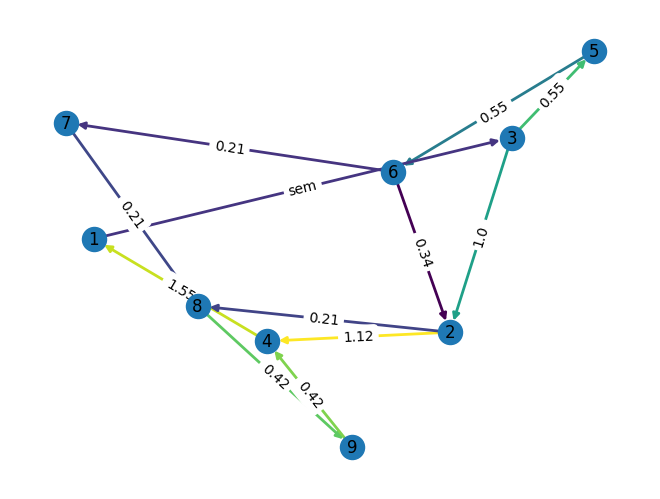

In [292]:
df = Kirchoff("g1")

Check passed
(0.4147762025688262, 0.07273382697471553, 0.39009235064918346, 0.16782066367991955, 0.40533521483891133, 0.7519320910201408, 0.502586191626124, 0.7447693937952902, 0.5886754582304002, 0.9980995052732257, 0.22336903796770957, 0.555621597776649, 0.9360062120608483, 0.5785720525099998, 0.534335146093428, 0.9319912179597273, 0.39688099318398573, 0.27139951937988105, 0.7155815440441183, 0.8397869671852083, 0.729670593717149, 0.4549841691103287, 0.14380128408163118, 0.9778658459149238, 0.4913658780949657, 0.2125500778476449, 0.3765284913472151, 0.8023310776047248, 0.5172401131938101, 0.9083350327350764, 0.9025295682169635, 0.40938944353455464, 0.27706557309102364, 0.27993550606952633, 0.34055718826306935, 0.4814203255987599, 0.801054462123996, 0.6775616821030545, 0.016061349602745634, 0.6570263195782914)


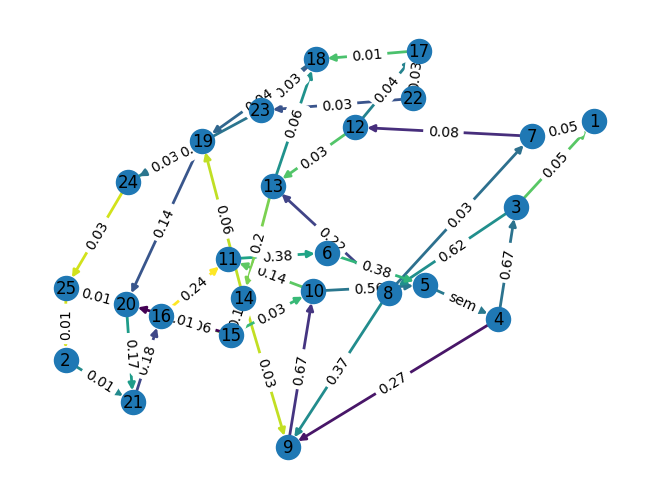

In [295]:
df = Kirchoff("grid5x5")

Check passed
(0.9908459881668973, 0.878511163778218, 0.2042256268496061, 0.4640390587733981, 0.3032921568948901, 0.8196495381682111, 0.2206490892050147, 0.504868884972476, 0.9110089561397973, 0.8815941304382658, 0.5957969801022208, 0.9867931884601009, 0.22821458674288497, 0.3576679177572891, 0.21745991837496914, 0.39013069722924076, 0.6596898946886294, 0.610557215397362, 0.22451166473563555, 0.66772781077837, 0.028230910015095145, 0.4929278798767195, 0.05140357497347414, 0.21965132378768626, 0.3819296934624289, 0.3068756393996026, 0.6923241132013301, 0.10403494864871543, 0.08034349190637291, 0.8773545204851442, 0.06556082255705409, 0.6718819095243965, 0.4657822488731066, 0.4626578678666373, 0.21640618395945588, 0.9859935637350109, 0.5010098620335927, 0.21412156793086412, 0.585810492535574, 0.29786549026623554, 0.41326757743413445, 0.6469041756397148, 0.7575140804287133, 0.6290707328370532, 0.5345242313566496, 0.5697653786583506, 0.9787599387590391, 0.6469235802216136, 0.024617695551572

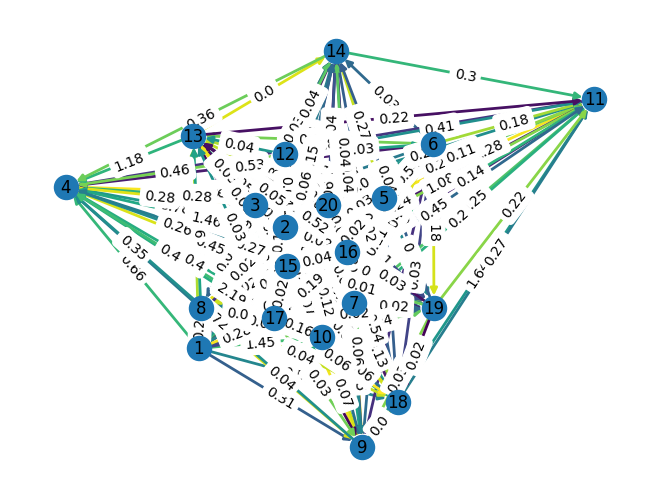

In [297]:
df = Kirchoff("clique20")


Check passed
(0.3076146180605662, 0.021255330420081986, 0.8347832974601674, 0.19485886533699637, 0.7792691580153065, 0.31441405991311266, 0.7790234903644607, 0.6140682335714479, 0.49388432984793296, 0.11346319407230532)


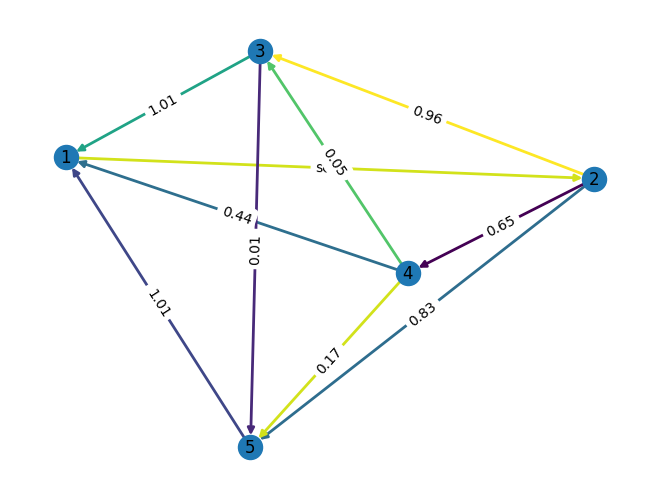

In [319]:
df = Kirchoff("clique5")


Check passed
(0.6354184994154897, 0.30834624922571763, 0.7781650182771254, 0.8082607703010933, 0.1418059415377375, 0.5825278225744654, 0.18472002489884354, 0.8209920187753161, 0.8486106999404877, 0.9525278967586296, 0.39719260965108194, 0.8957140211242618, 0.19312197189094216, 0.8371442163380873, 0.6456965632986683, 0.6682292857268587, 0.32102321551657165, 0.9657422295785185, 0.22341137528728405, 0.5793248357956108, 0.4945106197605059, 0.3866137014192248, 0.5173885174844319, 0.06005429412944874, 0.8440091734068664, 0.9078345186234731, 0.5947917992069413, 0.9362763729233684, 0.31797984967041415, 0.2408185977215277, 0.48111576117796784, 0.5891928230756224, 0.048718811114453864, 0.25613323554839373, 0.8393479755156368, 0.7284489639975863, 0.5412511902924474, 0.13341910879735308, 0.7764859990017465, 0.774698971710529, 0.7653667750903106, 0.432996717385862, 0.07078155283294296, 0.7559124855871953, 0.8366910673213149, 0.8875384057477959, 0.5245379161677493, 0.9786194880240461, 0.630592685973

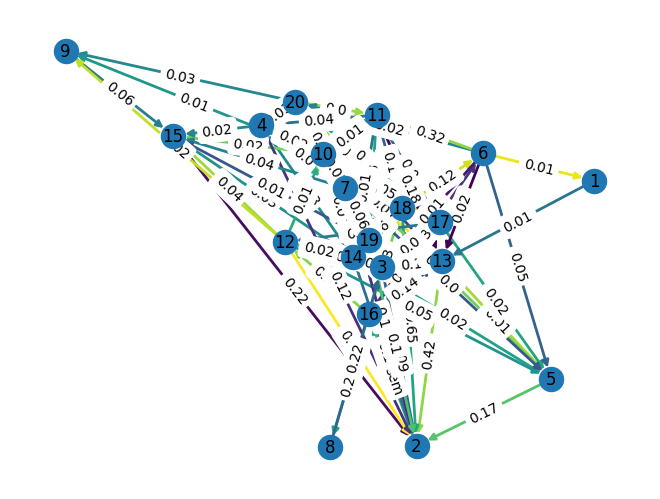

In [328]:
df = Kirchoff("rand20_100")

Wnioski :

W zasadzie w moim rozwiązaniu wykorzystałem bibliotekę numpy i funkcje
numpy.linalg.lstsq, bardzo pomaga w układzie nadokreślonym ponieważ, metoda
wykorzystuje najmniejsze kwadraty. Kierunek prądu jest zgodny z wskazówkami zegara
Przygotowałem pare testów duże mniejsze z większą ilością wierzchołków
i przeszły test.


A mianowicie wyliczam wartości natężen wychodzących i wchodzących do danych wierzchołków
jest równoważna jeśli a przynajmniej bardzo zbliżona przykładowo mniejsze od jakiejs precyzji
to test przechodzi. W moich obliczeniach wykorzystałem do sprawdzania 1e-12.
Do wyznaczania cykli prostych posłóżyłem sie biblioteka networkx
tak jak i do wyświetlania grafów.

Z braku czas nie zdążyłem przetestować większej ilości grafów
W moich rozważaniach podałem kliki, siatki, losowo generowane grafy

Czasami sie zdarza ze natezenie wyjdzie ujemne w takiej sytuacji zmieniam znak
i odwracam kierunek w tej krawędzi

Ogolnie posluzenie sie prawem Kirchoffa jest w porzadku aczkolwiek jest to bardzo uciążliwe